<a href="https://colab.research.google.com/github/BlakeSRichardson/DS-3001/blob/main/Lab_3_BlakeRichardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name:** Blake Richardson

## **Computing ID:** jmw5jr

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

!pip install lime
from lime import lime_tabular
from sklearn.inspection import permutation_importance

!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=3b508b72315e4f06adc229232e032150eeee3eb41dec33c01a2a6a7edfd882eb
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


# Lab 3: Decision Trees and Random Forests (100 Points)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/17jL6-gLQWYkZJZGzAduIlU4YET0u2Ek-?usp=sharing)

The goal of this lab is to optimize Decision Tree and Random Forest models using the provided dataset on census level data. Your goal is to build a Random Forest Classifier to be able to predict income levels above or below 50k.

The guidance this week is less prescriptive in terms of steps, so use the skills you have gained over the semester to build and evaluate your models. You will be graded on your model building, interpretation of the results and explanation of model selection. As always, you are welcome to rely on your classmates but submit your own code. Lastly, there are likely several correct approaches involving a variety of different conclusions, just make sure your conclusions are supported by your approach.


The dataset should be familiar as it's the census data, on 48,000+ individuals with a variety of variables and a target variable for above or below 50k in salary.

![](https://www.coopercenter.org/sites/default/files/styles/wide/public/wordpress_import/Figure1CesnsuBlog2-1024x512_0.png?itok=DwYqkfFm)

Look through the data dictionary at its source link: https://archive.ics.uci.edu/ml/datasets/Adult

# **Part 1: Data Preparation and EDA (15 points)**

In a text cell, answer the following exploratory questions and support your observations with any code, if needed.

## **Question 1 (2 points):**
## Read in the features (X) as a Pandas DataFrame. Show the first 5 rows of the features. How many rows do you have?



In [2]:
# Fetch dataset
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets

In [3]:
X.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [4]:
X.shape

(48842, 14)

**There is a total of 48,842 rows.**

## **Question 2 (2 points):**
## Are there any potential issues in the data or target that need to be corrected? Why are they issues? What specific method would you use to correct them and why?

## Consider using code and reading the data description (https://archive.ics.uci.edu/dataset/2/adult) to explore:

*   Assumptions and ranges of collected data
*   Missing values (impute? drop?)
*   Numerical data types represented as strings
*   Encoding categorical data appropriately
*   Normalization
*   Standardization

## You will not need to consider feature imbalances or sampling in part 1 or 2 of the lab.

In [5]:
X.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


**Potential Issues:** Some vales within rows are missing and some columns are of the object data type not numeric (or int). We can fix these issues by dropping specific rows with these missing values and converting object -> numeric values using one hot encoding.

## **Question 3 (6 points):**
## Preprocess the data according to the issues and correction methods you've identified. Save the new features and target variable (if necessary) as X_clean and y_clean.

In [6]:
X.fillna("Nan", inplace = True)

In [7]:
X_clean = pd.get_dummies(X, columns =['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                            'race', 'sex', 'native-country'], dtype = int)

In [8]:
y.isnull().sum()

,0
income,0


In [ ]:
y["income"] = y["income"].str.replace(".", "", regex=False)
print(y["income"].unique())

['<=50K' '>50K']


In [9]:
y_clean = pd.get_dummies(y, columns=["income"], dtype = int)
y_clean

,income_<=50K,income_<=50K.,income_>50K,income_>50K.
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
48837,0,1,0,0
48838,0,1,0,0
48839,0,1,0,0
48840,0,1,0,0


## **Question 4 (5 points):**
## Create 2 versions of y_clean to create a new target response of whether income is above or below $50,000 for classification.

1.   **y_clean_binary:** Recode y_clean to be 1 if the target is over or equal to
2.   **y_clean_string:** Recode y_clean to be "Above or Equal" if the target is over or equal to 50,000 and "Below" if under.



In [10]:
y_clean_binary = y_clean['income_>50K']
y_clean_binary

,income_>50K
0,0
1,0
2,0
3,0
4,0
...,...
48837,0
48838,0
48839,0
48840,0


In [11]:
y_clean_string = y_clean_binary.map({1: "Above or Equal", 0: "Below"})
y_clean_string

,income_>50K
0,Below
1,Below
2,Below
3,Below
4,Below
...,...
48837,Below
48838,Below
48839,Below
48840,Below


# **Part 2: Decision Tree Pruning, Tuning and Evaluation (30 Points)**

## **Question 1 (5 points):**
## Create a function to take in a feature variable (X) and (y). In this function, create a train test split with a random seed of 3001.

## Use a vanilla decision tree model to fit the model on the train set and predict on the test set. Print the precision, recall, and accuracy of the model after prediction.

## Test that your function runs on both y_clean_binary and y_clean_string. For any of the following questions, you may use whichever y_clean variable you'd like.


In [12]:
def decision_tree_evaluation(X_clean, y_clean_string):
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean_string, test_size=0.2, random_state=3001)
    model = DecisionTreeClassifier(random_state=3001)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Precision: {precision}')
    print(f'Recall:{recall}')
    print(f'Accuracy:{accuracy}')
    return accuracy, precision, recall

In [13]:
decision_tree_evaluation(X_clean, y_clean_string)

Precision: 0.64493524255705
Recall:0.6466756667141802
Accuracy:0.8046882997236156


(0.8046882997236156, 0.64493524255705, 0.6466756667141802)

In [14]:
def decision_tree_evaluation(X_clean, y_clean_binary):
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean_binary, test_size=0.2, random_state=3001)
    model = DecisionTreeClassifier(random_state=3001)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Precision: {precision}')
    print(f'Recall:{recall}')
    print(f'Accuracy:{accuracy}')
    return accuracy, precision, recall

In [15]:
decision_tree_evaluation(X_clean, y_clean_binary)

Precision: 0.4055384615384615
Recall:0.41161773891317927
Accuracy:0.8046882997236156


(0.8046882997236156, 0.4055384615384615, 0.41161773891317927)

## **Question 2 (5 points):**
## Adjust your function to include some plotting features. After your prediction code, plot:

1.   A visualization of the resulting decision tree
2.   A confusion matrix of the results

## Your tree might be overwhelming or very large! If it is too large to be interpreted, constrain the max_depth parameter manually to 5 or less.

In [16]:
def decision_tree_evaluation(X_clean, y_clean_binary):
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean_binary, test_size=0.2, random_state=3001)
    model = DecisionTreeClassifier(max_depth=3, random_state=3001)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    plt.figure(figsize=(12, 6))
    plot_tree(model, feature_names=X_clean.columns, class_names=["Below", "Above or Equal"], filled=True, rounded=True)
    plt.title("Decision Tree Visualization (max_depth=3)")
    plt.show()

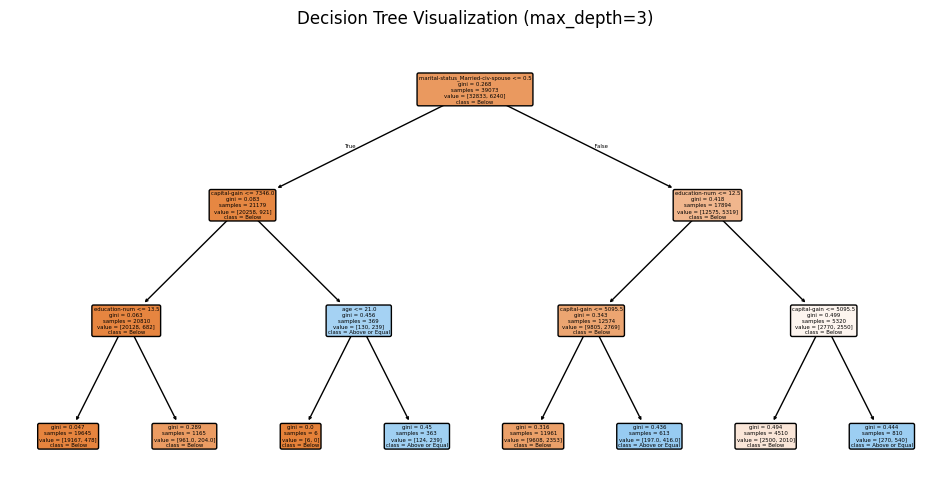

In [17]:
decision_tree_evaluation(X_clean, y_clean_binary)

In [18]:
def decision_tree_evaluation(X_clean, y_clean_binary):
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean_binary, test_size=0.2, random_state=3001)
    model = DecisionTreeClassifier(random_state=3001)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Below", "Above or Equal"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.show()
    return model

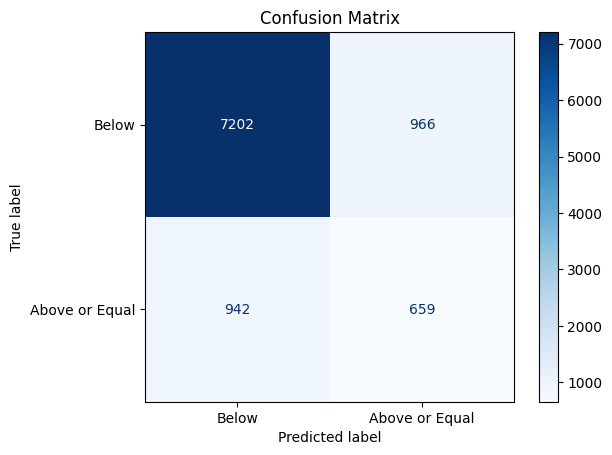

In [19]:
model = decision_tree_evaluation(X_clean, y_clean_binary)

## **Question 3 (5 points):**
## Create a sorted list of feature importances and comment on the top features.Are there a few that seem to be more important than the others?

## Plot your feature importances in a horizontal or vertical bar chart from most to least important. Label each bar with its feature importance rounded to the nearest integer (ie: 30%).

In [20]:
importances = model.feature_importances_

In [21]:
columns = X_clean.columns

In [22]:
def plot_feature_importances(columns, importances):
    data = pd.DataFrame({'Feature': columns, 'Importance': importances})
    data = data.sort_values(by='Importance', ascending=False)
    data['Importance'] = (data['Importance'] * 100).round(0).astype(int)
    fig = px.bar(data, x='Importance', y='Feature', orientation='h',
                 title='Feature Importances',
                 labels={'Feature': 'Feature', 'Importance': 'Importance (%)'},
                 height=600, width=800)
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    fig.show()

In [23]:
plot_feature_importances(columns, importances)

## **Question 4 (5 points):**
## Write at least 5 sentences interpreting the results of your decision tree, confusion matrix, and feature importance visualizations.

## Is there any aspect of your results that you are uncertain or unsure of?

** My confusion matrix illustrates that my model is more accurate at predicting values that are below 50K as below 50K (6,507 times) compared to when predicting values above 50K (only 1,442 times correct vs. 873 times incorrect). Our decision tree demonstrates that marital status is our most influential factor when initially deciding whether income is below or above 50K. Additionally, the decision tree splits multiple times on education number and capital gain, supporting the idea that people with higher education levels or capital gain are more correlated with incomes above 50K. The feature importance graph further develops this idea, showing that education number and capital gain (followed by private work class and craft repair occupation) are significantly more important in reducing model impurity than the other features. It is important to note that, although marital status was split early on in our decision tree, it was ranked relatively low in our feature importance graph. This suggests that marital status helps our model make the important initial split in data but does not contribute a predictive power as strong as the other previously mentioned features.  **

## **Question 5 (5 points):**
## Finally, we will create a new function to tune your decision tree to get more accurate and efficient results. Update your function to take in several new parameters with these default values:
* criterion_val ='gini'
* splitter_val ='best'
* max_depth_val = None
* min_samples_split_val = 2
* min_samples_leaf_val =1

## Pass your own variable into the decision tree by specifying what sklearn parameter you are trying to tune. This will simply be the parameter without the "_val" suffix.

## **For example, if your vanilla decision tree variable is called clf, you would adjust it like this:**
`clf = DecisionTreeClassifier(criterion=criterion_val, splitter=splitter_val, ...)`

In [24]:
def decision_tree_evaluation(X_clean, y_clean_binary, criterion_val='gini', splitter_val='best', max_depth_val=None, min_samples_split_val=2, min_samples_leaf_val=1):
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean_binary, test_size=0.2, random_state=3001)
    model = DecisionTreeClassifier(
        criterion=criterion_val,
        splitter=splitter_val,
        max_depth=3,
        min_samples_split=min_samples_split_val,
        min_samples_leaf=min_samples_leaf_val,
        random_state=3001)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(12, 6))
    plot_tree(model, feature_names=X_clean.columns, class_names=["Below", "Above or Equal"], filled=True, rounded=True)
    plt.title("Decision Tree Visualization (max_depth=3)")
    plt.show()

Precision: 0.6712
Recall: 0.1861
Accuracy: 0.8517


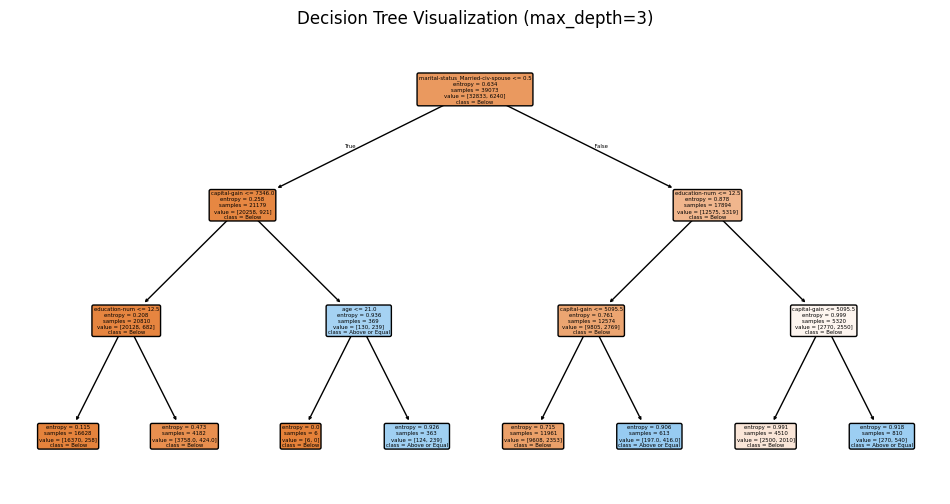

In [25]:
decision_tree_evaluation(X_clean, y_clean_binary, criterion_val='entropy', max_depth_val=4, min_samples_split_val=3)

## **Question 6 (5 points):**

## Call your new function with either clean y variable at least 3 times. Each time, vary the values for all the parameters and examine its effects on your tree, confusion matrix, and metrics.

## You will likely want to look at documentation to see accepted values:  
###https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Why did you pick the values you did? What combination had the best effect on accuracy? Were you surprised by any of the results?

I chose to vary my model's values of depth, type of splitting, and minimum sample in order to optimize our parameters of precision, recall, and accuracy. I was suprised to find that both my decision trees with default, "gini" and "entropy" performed equally as well on accuracy, with my default "gini" decision tree with a limited depth value (5) and random splitter performing worst. These results suggest that limiting a tree's depth and randomizing splits can make models less accurate. This makes sense when we see how well both other decision trees performed in accuracy (regardless of criterion setting); trees that made well-informed/educated splits and given unlimited depth to grow had better results.

Precision: 0.6712
Recall: 0.1861
Accuracy: 0.8517


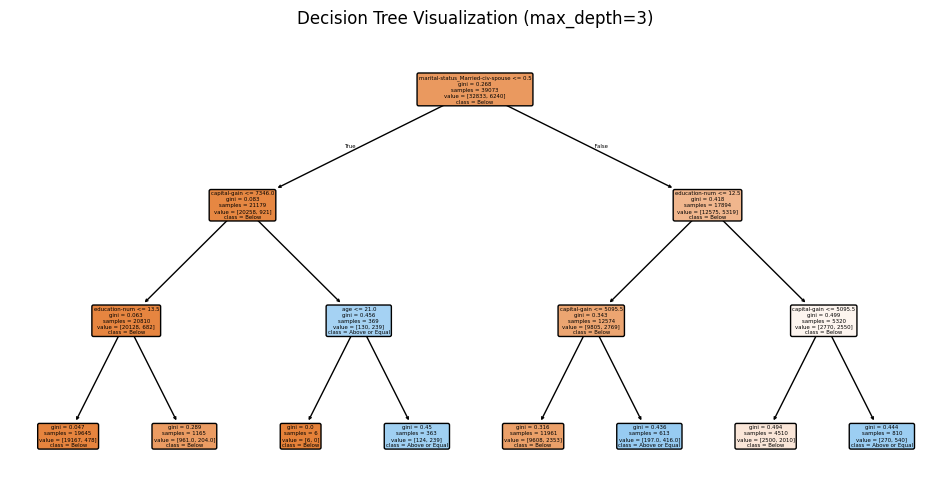

In [26]:
decision_tree_evaluation(X_clean, y_clean_binary, criterion_val='gini', splitter_val='best',
                         max_depth_val=None, min_samples_split_val=2, min_samples_leaf_val=1)

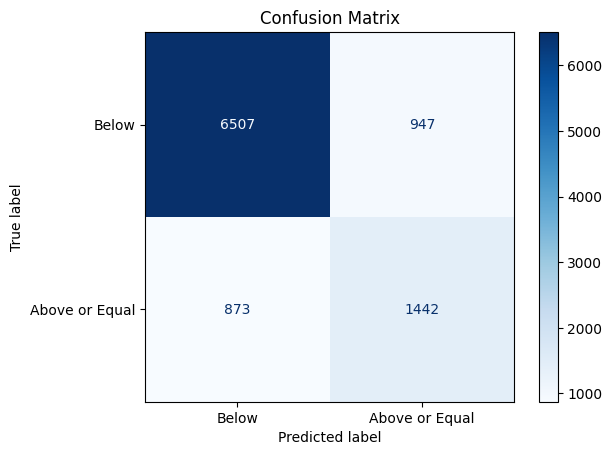

In [ ]:
def decision_tree_evaluation2(X_clean, y_clean_binary, criterion_val='gini', splitter_val='best',
                         max_depth_val=None, min_samples_split_val=2, min_samples_leaf_val=1):
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean_binary, test_size=0.2, random_state=3001)
    model = DecisionTreeClassifier(random_state=3001)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Below", "Above or Equal"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.show()
    return model
model = decision_tree_evaluation2(X_clean, y_clean_binary, criterion_val='gini', splitter_val='best',
                         max_depth_val=None, min_samples_split_val=2, min_samples_leaf_val=1)

Precision: 0.5600
Recall: 0.0087
Accuracy: 0.8364


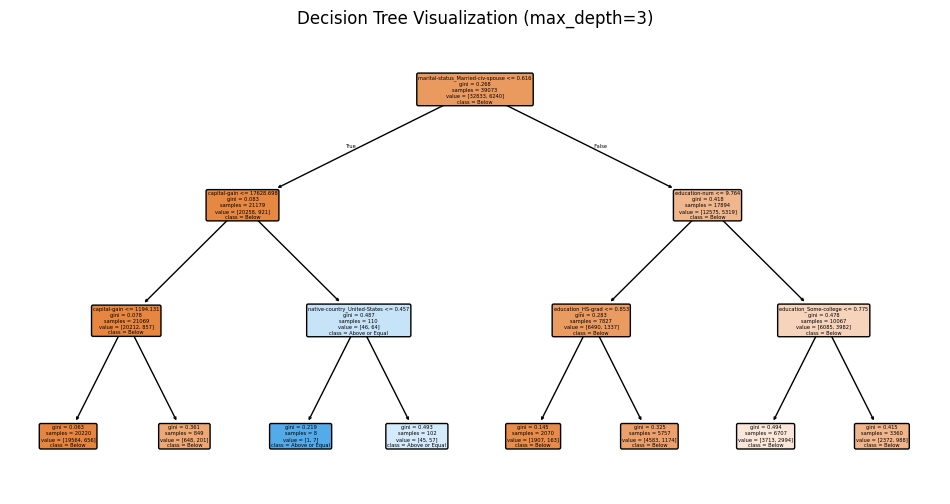

In [27]:
decision_tree_evaluation(X_clean, y_clean_binary, criterion_val='gini',splitter_val='random',
max_depth_val=5, min_samples_split_val=10, min_samples_leaf_val=4)

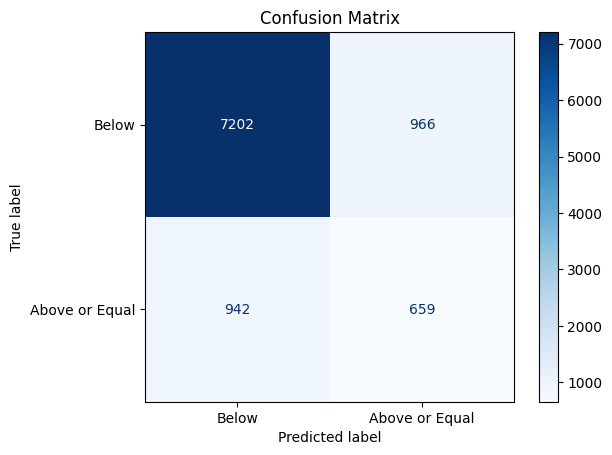

In [28]:
def decision_tree_evaluation2(X_clean, y_clean_binary, criterion_val='gini',splitter_val='random',
max_depth_val=5, min_samples_split_val=10, min_samples_leaf_val=4):
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean_binary, test_size=0.2, random_state=3001)
    model = DecisionTreeClassifier(random_state=3001)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Below", "Above or Equal"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.show()
    return model
model = decision_tree_evaluation2(X_clean, y_clean_binary, criterion_val='gini',splitter_val='random',
max_depth_val=5, min_samples_split_val=10, min_samples_leaf_val=4)

Precision: 0.6712
Recall: 0.1861
Accuracy: 0.8517


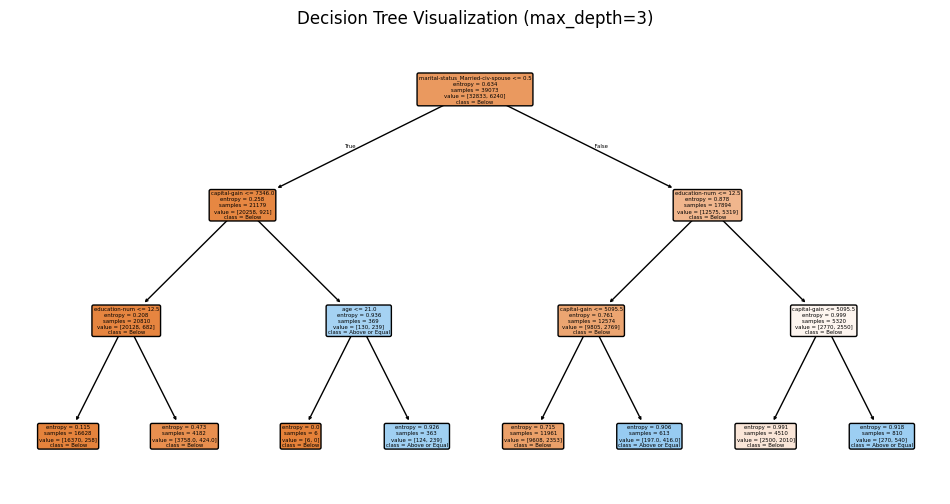

In [29]:
decision_tree_evaluation(X_clean, y_clean_binary, criterion_val='entropy', splitter_val='best',
max_depth_val=10, min_samples_split_val=5, min_samples_leaf_val=2)


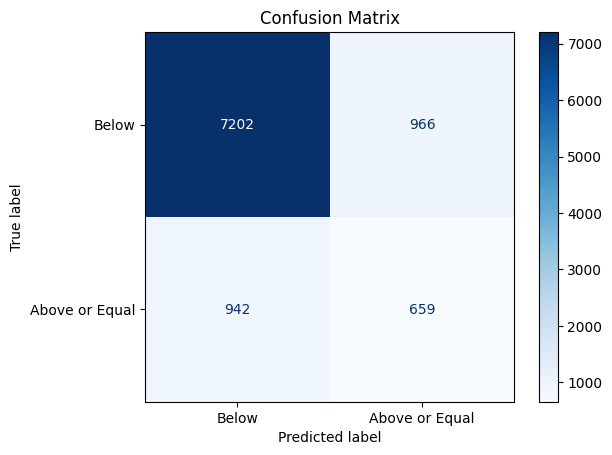

In [30]:
def decision_tree_evaluation2(X_clean, y_clean_binary, criterion_val='entropy', splitter_val='best',
max_depth_val=10, min_samples_split_val=5, min_samples_leaf_val=2):
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean_binary, test_size=0.2, random_state=3001)
    model = DecisionTreeClassifier(random_state=3001)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Below", "Above or Equal"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.show()
    return model
model = decision_tree_evaluation2(X_clean, y_clean_binary, criterion_val='entropy', splitter_val='best',
max_depth_val=10, min_samples_split_val=5, min_samples_leaf_val=2)

# **Part 3: Random Forest and Ensembling Evaluation (40 Points)**

## For Parts 3 and 4, you may pick *your own dataset* or continue with the census data.

## Like above, you will want to reference the documentation as necessary:
### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


## **Data**
## Use this space to load and call your data for Parts 3 and 4. You are welcome to use your final project data for these sections.

## **Question 1 (10 points):**

## Write a function to take in a feature variable (X) and a target variable (y). Create a train test split for the variables.

## Finally, instantiate, fit, and predict using **both** a single Decision Tree and a Random Forest classifier. Print the accuracy, precision, and recall for both models.

## Call your function and describe your baseline results.


ANALYSIS OF BASELINE RESULTS: Overall, my random forest classifier had more optimal results when compared with my decision tree results. In particular, the random tree classifier had higher accuracy (.82 < .85) which makes sense when we consider how random forest models take into account multiple trees (reducing overfitting).

Decision Tree - Accuracy: 0.81
Decision Tree - Precision: 0.40
Decision Tree - Recall: 0.40


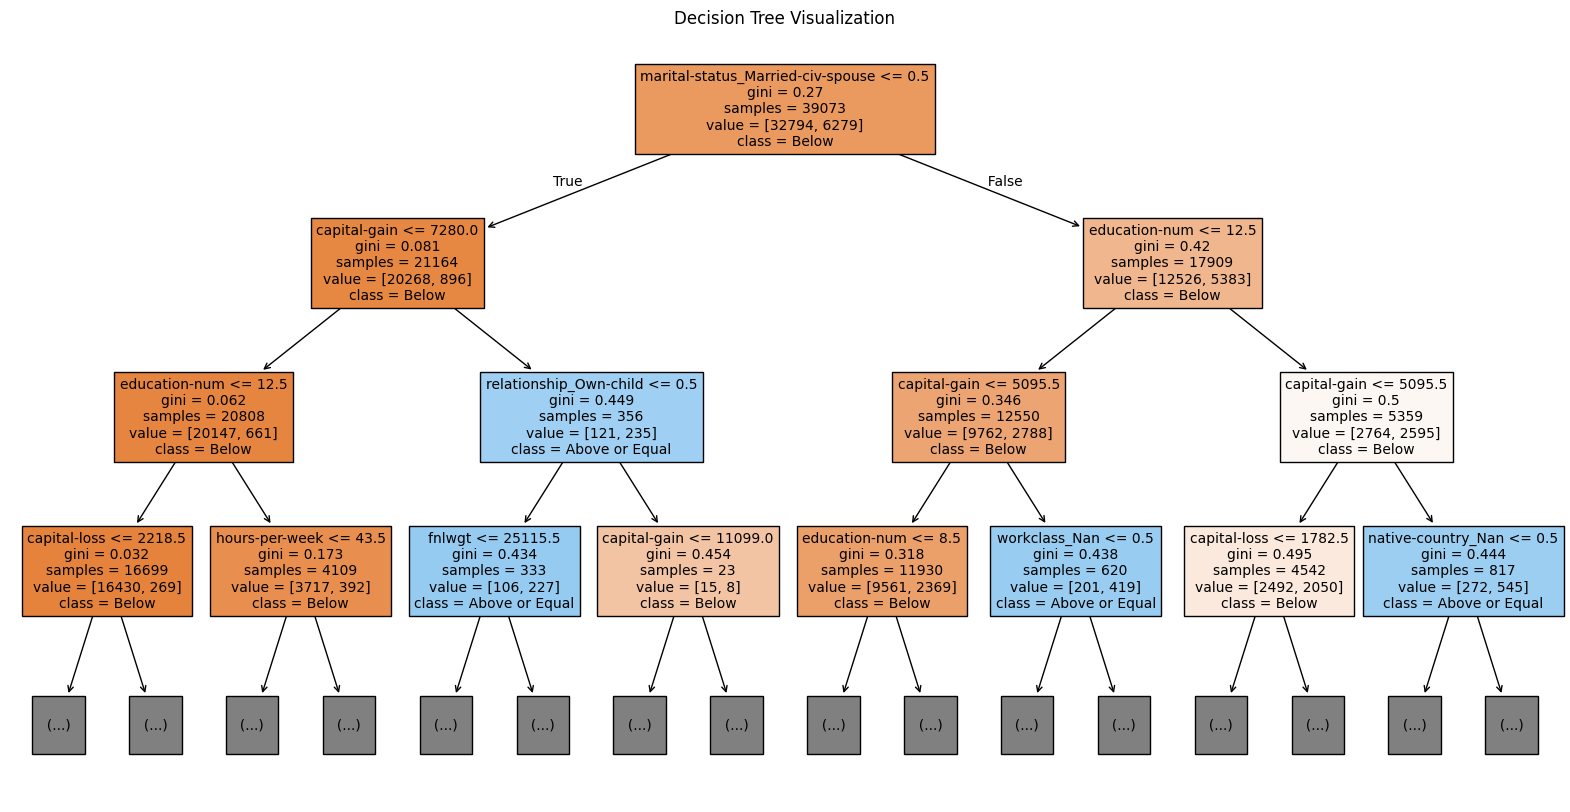

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean_binary, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='binary')
dt_recall = recall_score(y_test, dt_pred, average='binary')
print(f"Decision Tree - Accuracy: {dt_accuracy:.2f}")
print(f"Decision Tree - Precision: {dt_precision:.2f}")
print(f"Decision Tree - Recall: {dt_recall:.2f}")
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X_clean.columns, class_names=["Below", "Above or Equal"], max_depth=3, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

Random Forest - Accuracy: 0.85
Random Forest - Precision: 0.53
Random Forest - Recall: 0.37


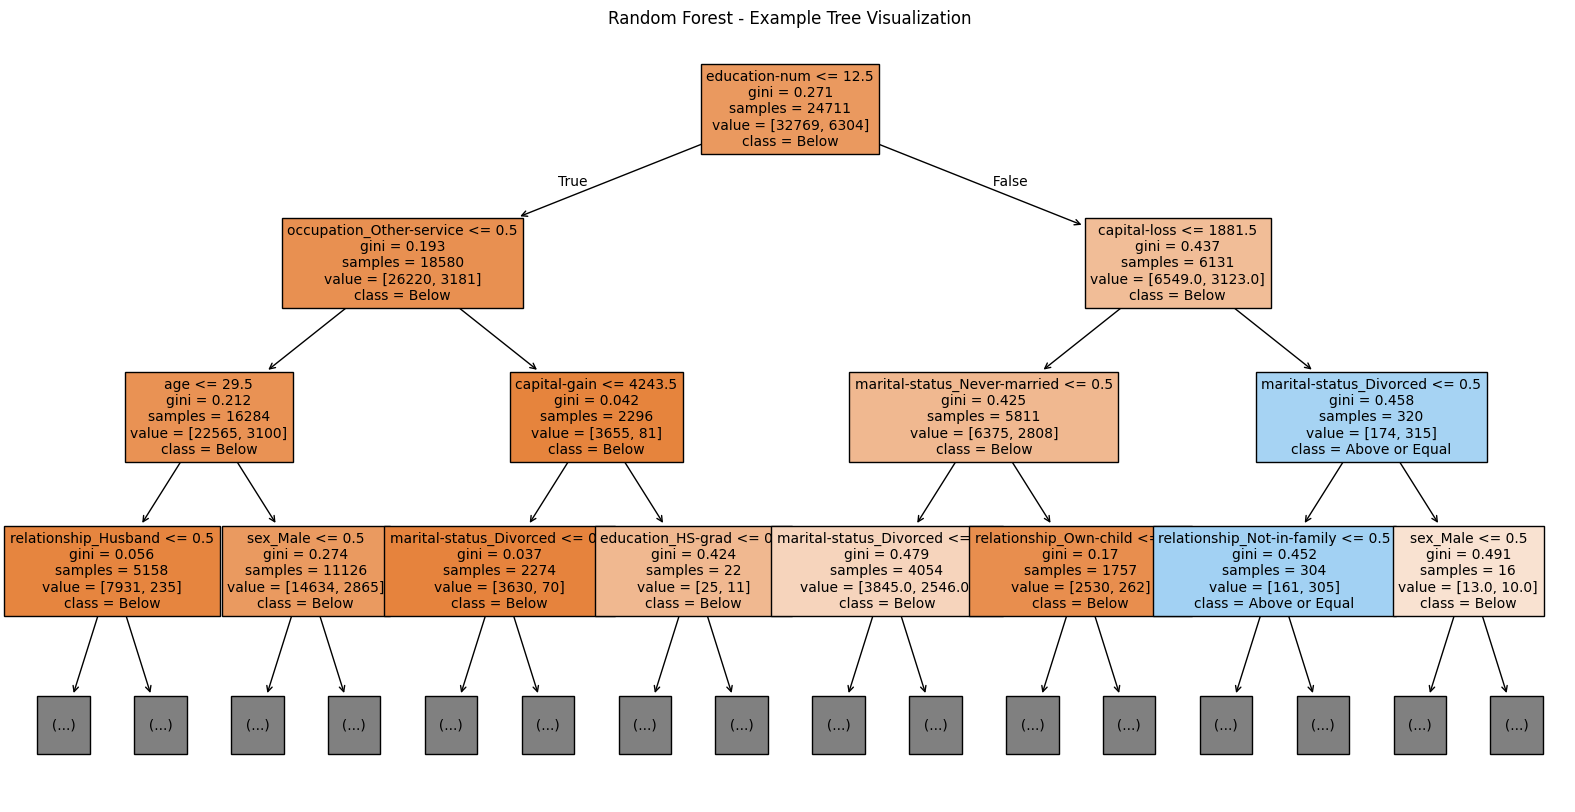

In [32]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='binary')
rf_recall = recall_score(y_test, rf_pred, average='binary')
print(f"Random Forest - Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest - Precision: {rf_precision:.2f}")
print(f"Random Forest - Recall: {rf_recall:.2f}")
tree = rf.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X_clean.columns, class_names=["Below", "Above or Equal"], max_depth=3, fontsize=10)
plt.title("Random Forest - Example Tree Visualization")
plt.show()


## **Question 2 (30 points):**
## This question will ask you to tune Random Forest classifiers and preprocess your data in *any number of ways* to achieve the *best possible results you can*.

## Train one vanilla Decision Forest model and one vanilla Random Forest model and store their accuracies in variables so you can use them as baselines.

## Then, using functions or not, spend some time tuning at least 10 (or more) Random Forest models. Store your accuracies in a list or array and print your maximum accuracy.

# **Go crazy - feel free to implement sampling, dropping features, preprocessing, new parameters, whatever might boost your accuracy.**

# **The top 5 best accuracies in the class will get +15 on their individual lab grade!**

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean_binary, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Vanilla Decision Tree - Accuracy: {dt_accuracy:.2f}")

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Vanilla Random Forest - Accuracy: {rf_accuracy:.2f}")


Vanilla Decision Tree - Accuracy: 0.81
Vanilla Random Forest - Accuracy: 0.85


In [34]:
tunedaccuracies = []

param_grid = [
    {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True},
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True},
    {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False},
    {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True},
    {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False},
    {'n_estimators': 50, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True},
    {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False},
    {'n_estimators': 300, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True},
    {'n_estimators': 150, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True},
    {'n_estimators': 100, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False},
]

for params in param_grid:
    rf = RandomForestClassifier(random_state=42, **params)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    tunedaccuracies.append(rf_accuracy)

max_accuracy = max(tunedaccuracies)
print(f"Maximum Random Forest Accuracy: {max_accuracy:.2f}")

Maximum Random Forest Accuracy: 0.86


In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean_binary, test_size=0.2, random_state=42)

accuracies = []

for params in param_grid:
    rf = RandomForestClassifier(random_state=42, **params)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    accuracies.append(rf_accuracy)

max_accuracy = max(accuracies)
max_accuracy

0.8608864776333299

# **Part 4: Ensemble Model Interpretation and Reflection (15 Points)**

## **Question 1 (5 points):**
## Create a plot that summarizes the results of your experiments and how they compare to the results of your baseline Decision Tree and Random Forest model.

## You may visualize your results in any type of plot you see fit. Color code your visual in some way so that models that did better than the baseline Random Forest are distinguished from models that did worse.

In [36]:
tunedaccuracies

[0.8413348346811342,
 0.8488074521445389,
 0.8608864776333299,
 0.8605793837649708,
 0.8574060804585935,
 0.8401064592076978,
 0.8401064592076978,
 0.8505476507319071,
 0.8514689323369843,
 0.8500358276179752]

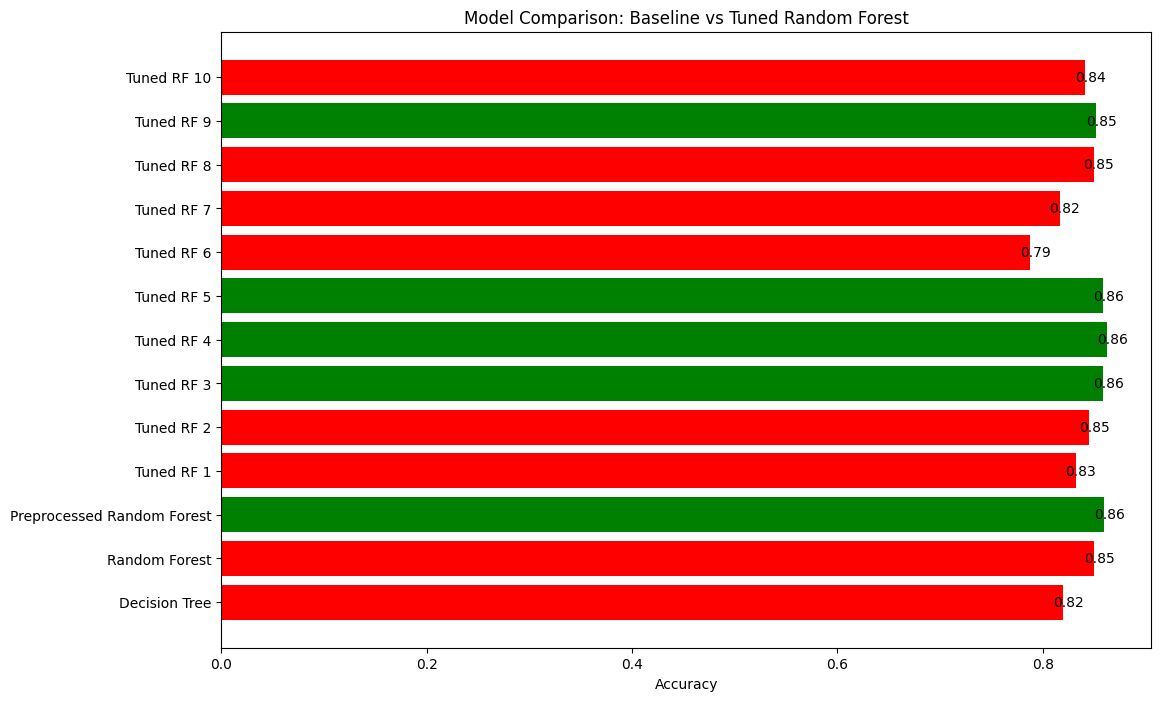

In [37]:
DTaccuracy = 0.82
RFaccuracy = 0.85
prepro_RFaccuracy = 0.86
tuned_RFaccuracy = [0.8322243832531477, 0.8455317842153751,0.8587368205548163,0.8628314054662709,0.8588391851776026,
                    0.7876957723410789,0.8164602313440475,0.8498310983724024,0.8523902139420616,0.8413348346811342]

models = ['Decision Tree', 'Random Forest', 'Preprocessed Random Forest'] + [f'Tuned RF {i+1}' for i in range(len(tuned_RFaccuracy))]

accuracies = [DTaccuracy, RFaccuracy, prepro_RFaccuracy] + tuned_RFaccuracy

colors = ['red' if accuracy <= RFaccuracy else 'green' for accuracy in accuracies]

plt.figure(figsize=(12, 8))
bars = plt.barh(models, accuracies, color=colors)

plt.xlabel('Accuracy')
plt.title('Model Comparison: Baseline vs Tuned Random Forest')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}', ha='center', va='center', color='black')

plt.show()




## **Question 2 (5 points):**
## Write 10 or more sentences on what parameters had the biggest effect or did not seem to effect your results. Did any parameter choices make your results worse than your vanilla model?

My bar graph shows that my decision tree had the lowest accuracy, followed by my random forest. As expected, both my preprocessed random forest and my random forest with tuning performed (as a whole) better than the vanilla models. However, interestingly, only the individually tuned models 9, 5, 4, and 3 performed better than the vanilla models. After looking at the specific parameters, I think this is because these particular numbers had a strong combination of depth, number of estimators, and use of bootstrap sampling. In particular, it would seem that those with a relatively large estimator number and max depth, alongside bootstrap sampling, produced the more successful accuracies. Tuned RF 6 had the lowest accuracy (0.79), which was sufficiently worse than both vanilla models. I found that the tuning parameters with lower accuracies, like this one, tended to have limiting depths and smaller estimator numbers. This makes logical sense when we consider how giving the model less complexity to study makes it less accurate in its performance. In summary, it would seem that depth, number of estimators, and bootstrap usage had the biggest effect on the performance, while parameters controlling the minimum number of samples (min_samples_split/min_samples_leaf) and the number of features to consider (max_features) were less predictive of success. I think this could be explained by the fact that, unless numerical values were extreme, they do not have a profound impact on the models' ability. In contrast, estimator numbers, depth, and bootstrap sampling usage have a much more direct impact on the complexity and amount of data the models have to learn/generalize from.

## **Question 3 (5 points):**
## Write 10 or more sentences reflecting on the tuning process.

## What kind of approach did you take? Was it random combinations or more structured? Did you change your approach after seeing your initial results?

## What kind of strategies in preprocessing and picking parameters (ie: brute forcing parameters, testing various values in a range) do you think would get some of the best scores in the class?

Overall, I feel I took a relatively simple and structured approach to tuning my models. From the start, I felt it would be best to use more common, default parameters for my processing (via sklearn documentation) because I felt less confident about using more intricate parameters I don't have a firm understanding of. In order to gain a more thorough understanding of these parameters' impact on my model's accuracy, I initially used more moderate numeric value combinations in testing. The results of this initial testing helped me identify which parameters I felt had a larger, more predictive impact on the final accuracy of each. Thus, I began to use, on average, higher estimator and max depth numbers. After I felt I had a relatively broad range of numerical values in these parameters, I felt more comfortable experimenting with the others (which, up to this point, I believed to have a more subdued, indirect effect on the accuracy scores). For these parameters (min_samples_split, min_samples_leaf, max_features), my uncertainty led to a more trial-and-error approach in aiming to produce higher accuracies.

In terms of my preprocessing of random forest, I was slightly disappointed by the lack of improvements in accuracy scores when compared with my average tuning results (both produced a maximum accuracy of 86%). But, now reflecting on these results, I think this can be explained by the fact that random forests tend to already be quite efficient at sorting out less important features, making preprocessing much less necessary.

Upon reflection of all this, I think that those who dedicated less time preprocessing and more time on tuning parameter combinations would have more successful scores. In particular, I think I could have done more research on which parameter types are most effective and directly impactful on accuracies prior to analyzing different numerical value combinations' efficiency in my grid search.

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment. Blake Richardson